### Find out where the users likely live and work at!

This dataset has call records for 10 users tracked over the course of 3 years.
In all plots, the X-Coordinate should be **Longitude**, and the Y coordinate should be **Latitude**. 
We don't yet know exactly where the user is located just based off the cell
phone tower position data; but considering the below are for calls that arrived in the twilight
of weekends, it's likely that wherever they are bunched up is probably near where the
caller's residence.

In [1]:
import pandas as pd
import numpy as np
                                                                                                
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("CDR.csv") #, sep = '\t')
print("numb.of.rows \n", df.count())

numb.of.rows 
 In           53188
Out          53188
Direction    53188
CallDate     53188
CallTime     53188
DOW          53188
Duration     53188
TowerID      53188
TowerLat     53188
TowerLon     53188
dtype: int64


In [3]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


### Load up the dataset and take a peek at its head
Convert the date using pd.to_datetime, and the time using pd.to_timedelta

In [4]:
df['CallTime'] = pd.to_datetime(df['CallTime'])
df.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,2019-02-24 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,2019-02-24 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,2019-02-24 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,2019-02-24 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,2019-02-24 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [5]:
df['time_hour'] = df.CallTime.apply(lambda x: x.hour)
df.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon,time_hour
0,4638472273,2666307251,Incoming,2010-12-25,2019-02-24 07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417,7
1,4638472273,1755442610,Incoming,2010-12-25,2019-02-24 21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500,21
2,4638472273,5481755331,Incoming,2010-12-25,2019-02-24 14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389,14
3,4638472273,1755442610,Incoming,2010-12-25,2019-02-24 16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389,16
4,4638472273,2145623768,Incoming,2010-12-25,2019-02-24 15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389,15


### Get a distinct list of "In" phone numbers

In [6]:
df_phone = df['In'] # This is Series (pandas.core.series.Series)
print(df_phone.head())

df_In_unique = df['In'].unique()
print("type(df_In_unique) = ", type(df_In_unique))
print('Numb.of.phones: ', np.size(df_phone), ', numb.of.unique.numbers: ', df_In_unique.shape)
df_In_unique

0    4638472273
1    4638472273
2    4638472273
3    4638472273
4    4638472273
Name: In, dtype: int64
type(df_In_unique) =  <class 'numpy.ndarray'>
Numb.of.phones:  53188 , numb.of.unique.numbers:  (10,)


array([4638472273, 1559410755, 4931532174, 2419930464, 1884182865,
       3688089071, 4555003213, 2068627935, 2894365987, 8549533077],
      dtype=int64)

In [7]:
# Transform pandas.core.series.Series into the regular python list
users = df_In_unique.tolist()  
print("regular python list: users:\n", users, "\n type(users) ", type(users))
len = np.size(users)
print("all users: ", len)


regular python list: users:
 [4638472273, 1559410755, 4931532174, 2419930464, 1884182865, 3688089071, 4555003213, 2068627935, 2894365987, 8549533077] 
 type(users)  <class 'list'>
all users:  10


### Create a slice for each phone

In [8]:
user0 = df[df['In'] == df_In_unique[0]]
print("user0 : \n", user0.head(), "\n all records: \n", user0.shape[0] )

user0 : 
            In         Out Direction    CallDate                   CallTime  \
0  4638472273  2666307251  Incoming  2010-12-25 2019-02-24 07:16:24.736813   
1  4638472273  1755442610  Incoming  2010-12-25 2019-02-24 21:18:30.053710   
2  4638472273  5481755331  Incoming  2010-12-25 2019-02-24 14:52:42.878016   
3  4638472273  1755442610  Incoming  2010-12-25 2019-02-24 16:02:09.001913   
4  4638472273  2145623768  Incoming  2010-12-25 2019-02-24 15:28:35.028554   

   DOW        Duration                               TowerID   TowerLat  \
0  Sat  0:02:41.741499  0db53dd3-eb9c-4344-abc5-c2d74ebc3eec  32.731611   
1  Sat  0:02:47.108750  aeaf8b43-8034-44fe-833d-31854a75acbf  32.731722   
2  Sat  0:04:35.356341  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944   
3  Sat  0:02:23.498499  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944   
4  Sat  0:03:54.692497  95d7920d-c3cd-4d20-a568-9a55800dc807  32.899944   

    TowerLon  time_hour  
0 -96.709417          7  
1 -96.709500      

In [9]:
records_per_user = []
for i in range(np.size(users)):
    records_for_phone_i = df[df['In'] == df_In_unique[i]] # get all records for phone users[i]
    records_per_user.append(records_for_phone_i)

for i in range(np.size(users)):
    print( i,  ', phone: ', users[i],  ' len of recorsd ',   records_per_user[i].shape[0] )

0 , phone:  4638472273  len of recorsd  3648
1 , phone:  1559410755  len of recorsd  11633
2 , phone:  4931532174  len of recorsd  2896
3 , phone:  2419930464  len of recorsd  2497
4 , phone:  1884182865  len of recorsd  2865
5 , phone:  3688089071  len of recorsd  1610
6 , phone:  4555003213  len of recorsd  2410
7 , phone:  2068627935  len of recorsd  5835
8 , phone:  2894365987  len of recorsd  12053
9 , phone:  8549533077  len of recorsd  7741


### Plot (Latitude,  Longitude)-distribution for each phone

In [10]:
# Save picture with the given name
def showandtell(title=None):
    if title != None: 
        plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
        plt.title(title)
        plt.show()

len(users):  10


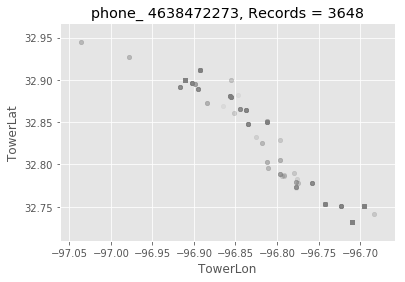

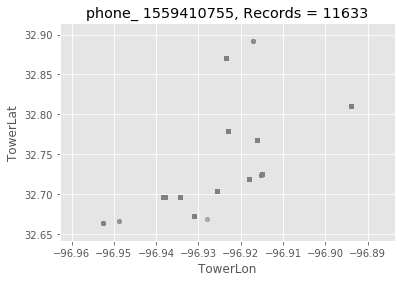

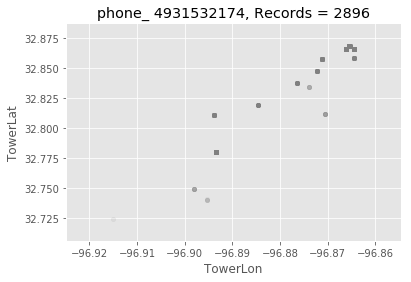

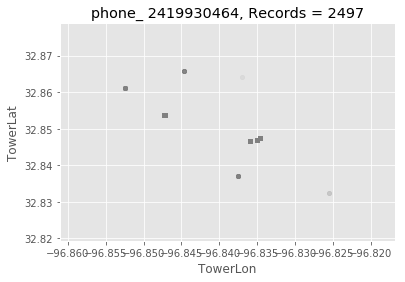

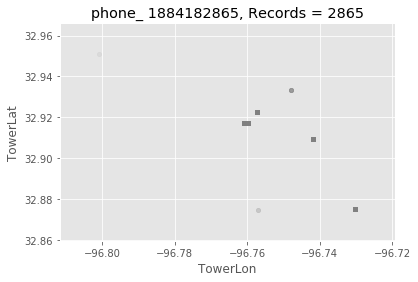

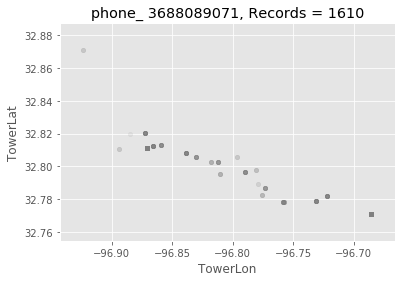

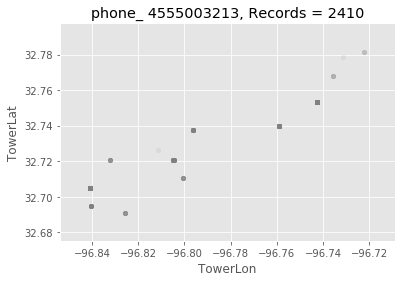

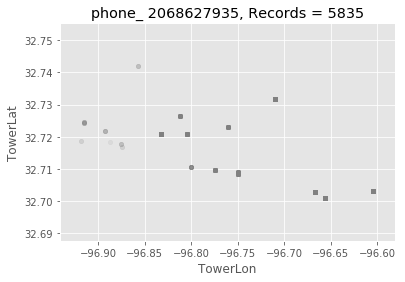

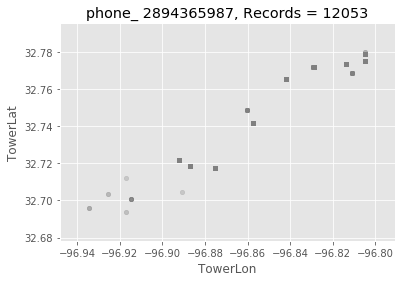

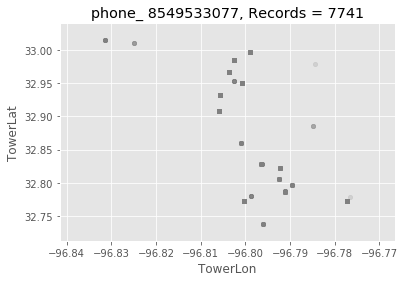

In [20]:
len = np.size(users)
print('len(users): ', len)
for i in range(len):
    title = "phone_ " + str(users[i]) + ', Records = ' + str(records_per_user[i].shape[0])
    records_per_user[i].plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title=title) # ='Call Locations')
    showandtell(title)  # Show and save the plot
#    showandtell("phone_ " + str(users[i]) + ', Records = ' + str(records_per_user[i].shape[0]))  # Show and save the plot

### Only Weekend  coordinates of the first phone 

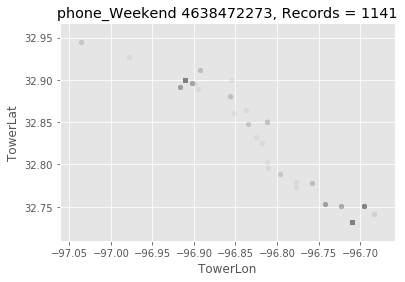

In [12]:
# (Latitude, Longitude)-distribution
user0_weekend = user0[(user0['DOW'] == 'Sat') | (user0['DOW'] == 'Sun')]
#print("user0_weekend : \n", user0_weekend.head(), "\n all records: \n", len(user0_weekend))
user0_weekend.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
len_weekend = user0_weekend.shape[0]
showandtell("phone_Weekend " + str(users[0]) + ', Records = ' + str(len_weekend) )

In [13]:
#user0_Satarday = user0[user0['DOW'] == 'Sat']
#print('type of user0_Satarday: ', type(user0_Satarday))
#print("user0_Satarday : \n", user0_Satarday.head())
#user0_Satarday.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
#len = user0_Satarday.shape[0]
#showandtell("phone_Satarday " + str(users[0]) + ', Records = ' + str(len) )

### User 0: from 13:00 to 16:00,  
Northwest Dallas, Dallas, TX, USA, coords (32.900178, -96.910410)


### User 0: from 22:00 to 6:00, 

6512 C F Hawn Fwy, Dallas, TX 75217, USA, coords:  (32.731652, -96.709433) and (32.731784, -96.709511)    

### Only Satarday from 13:00 to 16:00,  coordinates of the first phone

all rows of 'coord 13:00 to 16:00' =  133
       TowerLat   TowerLon
6952  32.899944 -96.910389
7922  32.899944 -96.910389
7924  32.899944 -96.910389
7926  32.899944 -96.910389
8354  32.899944 -96.910389


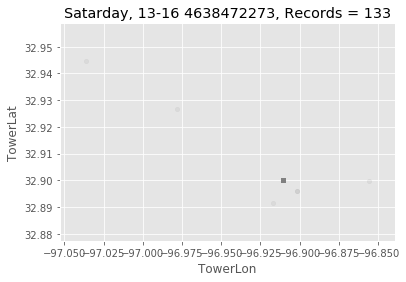

In [14]:
user0_Sat_1to4AM = user0[(user0['DOW'] == 'Sat') & (user0['time_hour'] > 13) & (user0['time_hour'] < 16)]
#print("user0_Sat_to4AM : \n", user0_Sat_1to4AM.head(), "\n all records: \n", user0_Sat_1to4AM.shape[0])
user0_Sat_1to4AM.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')

coord_1to4AM = user0_Sat_1to4AM[['TowerLat', 'TowerLon']]
print("all rows of 'coord 13:00 to 16:00' = ", coord_1to4AM.shape[0])
print(coord_1to4AM[10:15])

len = user0_Sat_1to4AM.shape[0]
showandtell("Satarday, 13-16 " + str(users[0]) + ', Records = ' + str(len) )

### Weekday night , coordinates of the first phone

all rows of 'coord' =  3
        TowerLat   TowerLon
7537   32.731611 -96.709417
38330  32.731722 -96.709500
52268  32.731611 -96.709417


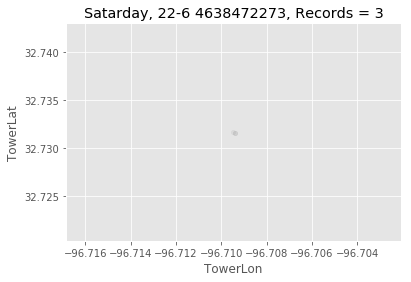

In [15]:
user0_bef6AM_aft22PM = user0[(user0['DOW'] != 'Sat') & (user0['DOW'] != 'Sun') & (user0['time_hour'] > 0) & (user0['time_hour'] < 6)]
#print("user0_bef6AM_aft22PM : \n", user0_bef6AM_aft22PM.head(), "\n all records: \n") 
      
user0_bef6AM_aft22PM.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
coord_22to06 = user0_bef6AM_aft22PM[['TowerLat', 'TowerLon']]

#print('coord: ', type(coord))
print("all rows of 'coord' = ", coord_22to06.shape[0])
print(coord_22to06[:5])
len = user0_bef6AM_aft22PM.shape[0]
showandtell("Satarday, 22-6 " + str(users[0]) + ', Records = ' + str(len) )

In [16]:
print(type(users))
print(users)

<class 'list'>
[4638472273, 1559410755, 4931532174, 2419930464, 1884182865, 3688089071, 4555003213, 2068627935, 2894365987, 8549533077]


### 5 uers: (lat, lon) coord from 13:00 to 16:00 

* User 0: 11455 Newkirk St, Dallas, TX 75229, USA **(32.900187, -96.910335)**
* User 1: Dallas, Texas, USA, **(32.696971, -96.934350) **
* User 2: 3126 Mican Dr, Dallas, TX 75212, USA, **(32.780522, -96.893387)**
* User 3: Unnamed Road, Dallas, TX 75235, USA  **(32.853782, -96.847260)**
* User 4: 8500 Lyndon B Johnson Fwy, Dallas, TX 75243, USA, **(32.922893, -96.757226)**

### Only Satarday from 13:00 to 16:00, all phones

In [17]:
len = np.size(users)
for i in range(len):
    u = records_per_user[i]
    u_Sat_after_1to4AM =  u[(u['DOW'] == 'Sat') & (u['time_hour'] > 13) & (u['time_hour'] < 16)]
    c_13to16 = u_Sat_after_1to4AM[['TowerLat', 'TowerLon']]
    print('Phone: ', users[i], 'all rows of coord from 13:00 to 16:00 = ' , c_13to16.shape[0])
print('\n')    
for i in range(len):    
    print('Phone: ', users[i], ', Five rows (lat, lon) 13:00 to 16:00 = \n', c_13to16[:5], '\n')
    

Phone:  4638472273 all rows of coord from 13:00 to 16:00 =  133
Phone:  1559410755 all rows of coord from 13:00 to 16:00 =  396
Phone:  4931532174 all rows of coord from 13:00 to 16:00 =  96
Phone:  2419930464 all rows of coord from 13:00 to 16:00 =  75
Phone:  1884182865 all rows of coord from 13:00 to 16:00 =  98
Phone:  3688089071 all rows of coord from 13:00 to 16:00 =  58
Phone:  4555003213 all rows of coord from 13:00 to 16:00 =  93
Phone:  2068627935 all rows of coord from 13:00 to 16:00 =  200
Phone:  2894365987 all rows of coord from 13:00 to 16:00 =  413
Phone:  8549533077 all rows of coord from 13:00 to 16:00 =  317


Phone:  4638472273 , Five rows (lat, lon) 13:00 to 16:00 = 
        TowerLat   TowerLon
535   32.985083 -96.802528
541   32.985083 -96.802528
546   32.985083 -96.802528
1001  32.985083 -96.802528
1480  32.985083 -96.802528 

Phone:  1559410755 , Five rows (lat, lon) 13:00 to 16:00 = 
        TowerLat   TowerLon
535   32.985083 -96.802528
541   32.985083 -96.802

### Weekday night , all phones

Phone:  4638472273 all rows of coord from 22:00 to 6:00 =  3
Several rows (lat, lon) 22:00 to 6:00 = 
         TowerLat   TowerLon
7537   32.731611 -96.709417
38330  32.731722 -96.709500
52268  32.731611 -96.709417 



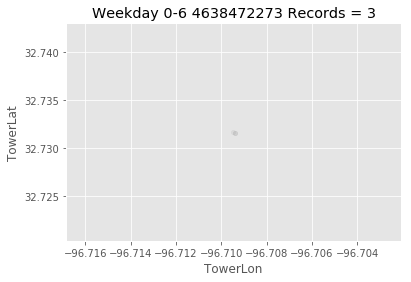

Phone:  1559410755 all rows of coord from 22:00 to 6:00 =  23
Several rows (lat, lon) 22:00 to 6:00 = 
         TowerLat   TowerLon
6317   32.870944 -96.923528
7805   32.870972 -96.923556
12166  32.870944 -96.923528
12300  32.870972 -96.923556
13204  32.870972 -96.923556 



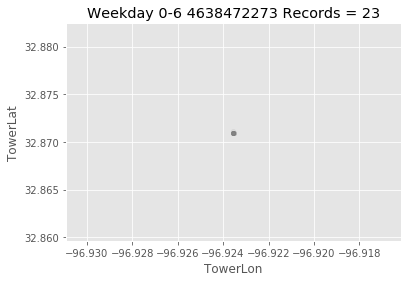

Phone:  4931532174 all rows of coord from 22:00 to 6:00 =  1
Several rows (lat, lon) 22:00 to 6:00 = 
         TowerLat   TowerLon
36155  32.865806 -96.866028 



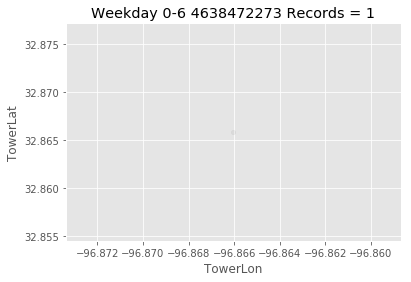

Phone:  2419930464 all rows of coord from 22:00 to 6:00 =  4
Several rows (lat, lon) 22:00 to 6:00 = 
         TowerLat   TowerLon
8211   32.847528 -96.834583
25274  32.846944 -96.834972
26818  32.846944 -96.834972
52377  32.846944 -96.834972 



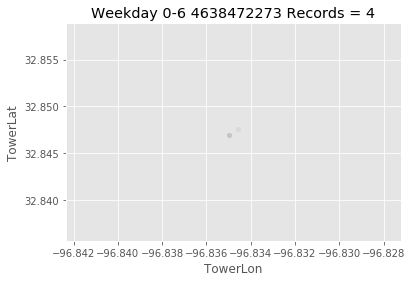

Phone:  1884182865 all rows of coord from 22:00 to 6:00 =  0
Several rows (lat, lon) 22:00 to 6:00 = 
 Empty DataFrame
Columns: [TowerLat, TowerLon]
Index: [] 


****** No records for phone  1884182865  in these conditions ******

Phone:  3688089071 all rows of coord from 22:00 to 6:00 =  3
Several rows (lat, lon) 22:00 to 6:00 = 
         TowerLat   TowerLon
33772  32.770833 -96.685556
44909  32.770833 -96.685556
45745  32.770833 -96.685556 



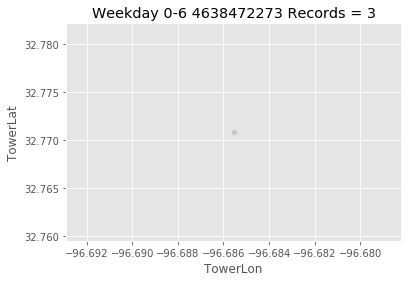

Phone:  4555003213 all rows of coord from 22:00 to 6:00 =  0
Several rows (lat, lon) 22:00 to 6:00 = 
 Empty DataFrame
Columns: [TowerLat, TowerLon]
Index: [] 


****** No records for phone  4555003213  in these conditions ******

Phone:  2068627935 all rows of coord from 22:00 to 6:00 =  1
Several rows (lat, lon) 22:00 to 6:00 = 
        TowerLat   TowerLon
7760  32.703056 -96.604444 



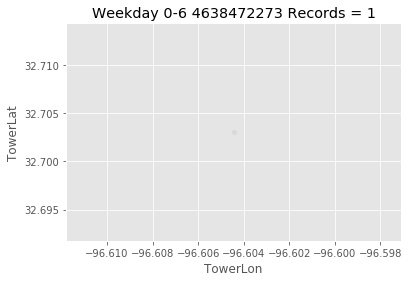

Phone:  2894365987 all rows of coord from 22:00 to 6:00 =  26
Several rows (lat, lon) 22:00 to 6:00 = 
        TowerLat   TowerLon
1300  32.773611 -96.813611
1719  32.773611 -96.813611
2268  32.773611 -96.813611
4450  32.773611 -96.813611
4540  32.779167 -96.805000 



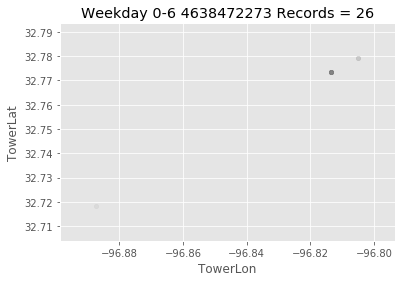

Phone:  8549533077 all rows of coord from 22:00 to 6:00 =  1
Several rows (lat, lon) 22:00 to 6:00 = 
        TowerLat   TowerLon
6734  32.772361 -96.777278 



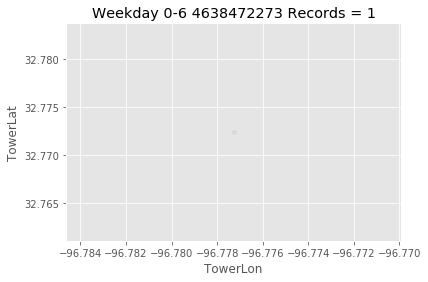

In [18]:
len = np.size(users)
for i in range(len):
    u = records_per_user[i]
    u_Before_6AM =  u[ (u['DOW'] != 'Sat') & (u['DOW'] != 'Sun') & (u['time_hour'] > 0) & (u['time_hour'] < 6)]
    c_22to6 = u_Before_6AM[['TowerLat', 'TowerLon']]
    print('Phone: ', users[i], 'all rows of coord from 22:00 to 6:00 = ' , c_22to6.shape[0])
    print("Several rows (lat, lon) 22:00 to 6:00 = \n", c_22to6[:5], '\n')
    
    len = u_Before_6AM.shape[0]
    if len:
        u_Before_6AM.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
        showandtell("Weekday 0-6 " + str(users[0]) + ' Records = ' + str(len) )
        
#        kmeans_model = KMeans(n_clusters=1) # 5)
#        kmeans_model.fit(c_22to6)
#        centroids = kmeans_model.cluster_centers_
#        fig = plt.figure()
#        ax = fig.add_subplot(111)
#        ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
#        print("centroid: \n", centroids)
    else:
        print("\n****** No records for phone ", users[i], " in these conditions ******\n" )    